In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np

In [4]:
df = pd.read_csv('Uni-usd-max.csv')
df.head(10)

,snapped_at,price,market_cap,total_volume
0,2020-09-17 00:00:00 UTC,3.443832,2.199132e+08,1.802085e+09
1,2020-09-18 00:00:00 UTC,3.443832,2.199132e+08,1.802085e+09
2,2020-09-19 00:00:00 UTC,7.097694,7.328221e+08,5.688408e+09
3,2020-09-20 00:00:00 UTC,5.702061,6.472084e+08,2.050756e+09
4,2020-09-21 00:00:00 UTC,5.256579,6.324213e+08,1.316669e+09
5,2020-09-22 00:00:00 UTC,4.294819,5.265206e+08,1.074199e+09
6,2020-09-23 00:00:00 UTC,3.908449,4.871864e+08,6.979289e+08
7,2020-09-24 00:00:00 UTC,4.342897,5.584493e+08,9.764303e+08
8,2020-09-25 00:00:00 UTC,5.138561,6.707124e+08,7.767605e+08
9,2020-09-26 00:00:00 UTC,4.908146,6.468531e+08,6.268236e+08


snapped_at: This column represents the timestamp at which the data was recorded or "snapped". It's important to note that timestamps can be in different timezones or formats, so it's important to check the specific format and timezone used in your dataset.

price: This column represents the price of the asset or cryptocurrency being tracked in the dataset. The price is typically quoted in the currency of the market where it's being traded, such as US dollars or euros.

market_cap: This column represents the total market value of the asset or cryptocurrency being tracked in the dataset. The market cap is calculated by multiplying the circulating supply of the asset by its current market price.

total_volume: This column represents the total volume of the asset or cryptocurrency being traded on the market in the timeframe covered by the dataset. The volume is the total number of units of the asset that have been traded during a specific period, such as a day or an hour.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    913 non-null    object 
 1   price         913 non-null    float64
 2   market_cap    913 non-null    float64
 3   total_volume  913 non-null    float64
dtypes: float64(3), object(1)
memory usage: 28.7+ KB


In [6]:
import pandas as pd
from datetime import datetime

# Convert snapped_at column to datetime format
df['snapped_at'] = pd.to_datetime(df['snapped_at'], format='%Y-%m-%d %H:%M:%S %Z')

# Extract date and time components
df['date'] = df['snapped_at'].dt.date
df['time'] = df['snapped_at'].dt.time

# Print first few rows to check results
df.head()


,snapped_at,price,market_cap,total_volume,date,time
0,2020-09-17 00:00:00+00:00,3.443832,2.199132e+08,1.802085e+09,2020-09-17,00:00:00
1,2020-09-18 00:00:00+00:00,3.443832,2.199132e+08,1.802085e+09,2020-09-18,00:00:00
2,2020-09-19 00:00:00+00:00,7.097694,7.328221e+08,5.688408e+09,2020-09-19,00:00:00
3,2020-09-20 00:00:00+00:00,5.702061,6.472084e+08,2.050756e+09,2020-09-20,00:00:00
4,2020-09-21 00:00:00+00:00,5.256579,6.324213e+08,1.316669e+09,2020-09-21,00:00:00


In [7]:
df.drop(['snapped_at'], axis=1, inplace=True)
df.head(5)

,price,market_cap,total_volume,date,time
0,3.443832,2.199132e+08,1.802085e+09,2020-09-17,00:00:00
1,3.443832,2.199132e+08,1.802085e+09,2020-09-18,00:00:00
2,7.097694,7.328221e+08,5.688408e+09,2020-09-19,00:00:00
3,5.702061,6.472084e+08,2.050756e+09,2020-09-20,00:00:00
4,5.256579,6.324213e+08,1.316669e+09,2020-09-21,00:00:00


In [8]:
from collections import Counter

# Find the duplicates and their count using Counter
duplicates = Counter(df)

# Create a list of duplicate items
duplicate_items = [item for item, count in duplicates.items() if count > 1]

# Create a dictionary of the indices of the duplicates
duplicate_indices = {item: [index for index, value in enumerate(df) if value == item] for item in duplicate_items}

print("Duplicate items: ", duplicate_items)
print("Duplicate indices: ", duplicate_indices)

Duplicate items:  []
Duplicate indices:  {}


In [9]:
unique_number = []  # calculate the # unique values in each column
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x) # append(x) will add the unique number to the 
pd.DataFrame(unique_number,index = df.columns,columns=["Total Unique Value"])

,Total Unique Value
price,912
market_cap,912
total_volume,912
date,913
time,1


In [10]:
df.drop(['time'], axis=1, inplace=True)
df.head(5)

,price,market_cap,total_volume,date
0,3.443832,2.199132e+08,1.802085e+09,2020-09-17
1,3.443832,2.199132e+08,1.802085e+09,2020-09-18
2,7.097694,7.328221e+08,5.688408e+09,2020-09-19
3,5.702061,6.472084e+08,2.050756e+09,2020-09-20
4,5.256579,6.324213e+08,1.316669e+09,2020-09-21


**Uniswap Price Volatility Analysis**

In [11]:
df['returns'] = df['price'].pct_change()

# Calculate volatility
df['volatility'] = df['returns'].rolling(window=30).std()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         913 non-null    float64
 1   market_cap    913 non-null    float64
 2   total_volume  913 non-null    float64
 3   date          913 non-null    object 
 4   returns       912 non-null    float64
 5   volatility    883 non-null    float64
dtypes: float64(5), object(1)
memory usage: 42.9+ KB


In [13]:
df = df.dropna(subset=['volatility'])


            price    market_cap  total_volume     returns  volatility
count  883.000000  8.830000e+02  8.830000e+02  883.000000  883.000000
mean    13.875803  6.949548e+09  4.112405e+08    0.003000    0.063295
std      9.882426  5.057242e+09  4.706208e+08    0.066742    0.024251
min      1.928177  4.115408e+08  3.097711e+07   -0.329410    0.024373
25%      6.037174  3.814098e+09  1.378812e+08   -0.035495    0.046184
50%      9.027803  4.911461e+09  2.337269e+08    0.001970    0.060926
75%     21.864792  1.021932e+10  4.519903e+08    0.036818    0.072537
max     42.884097  2.253105e+10  4.724011e+09    0.453239    0.216747


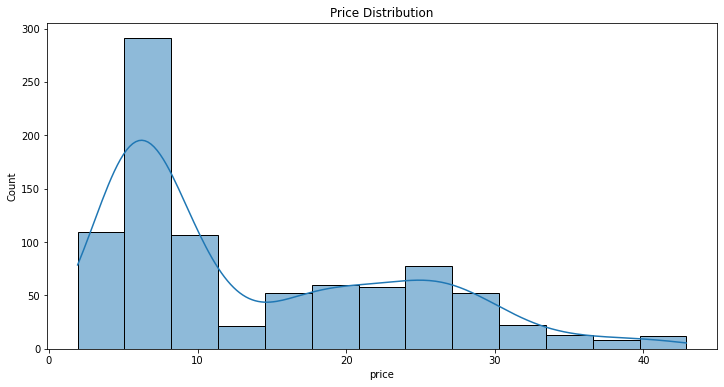

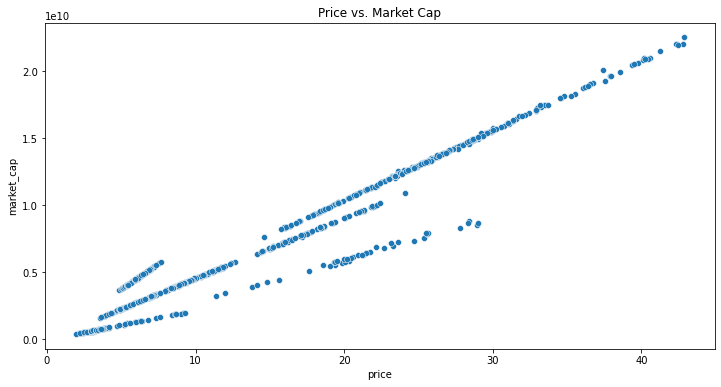

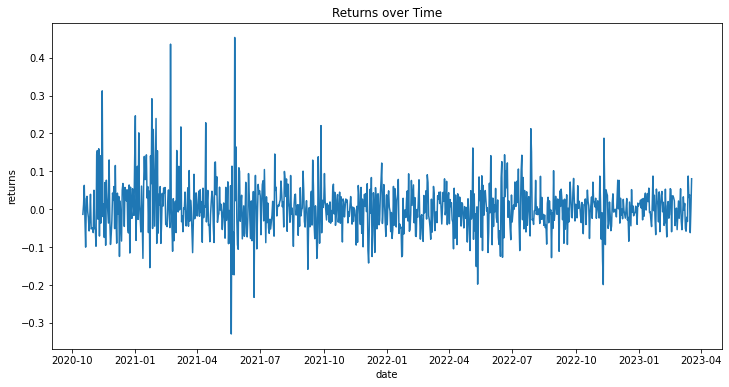

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check summary statistics
print(df.describe())

# Plot a histogram of the price variable
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="price", kde=True)
plt.title('Price Distribution')
plt.show()

# Plot a scatter plot of price vs. market_cap
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="price", y="market_cap")
plt.title('Price vs. Market Cap')
plt.show()

# Plot a line plot of returns over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="returns")
plt.title('Returns over Time')
plt.show()




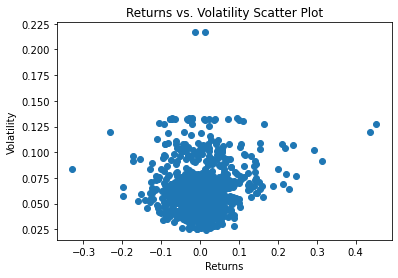

Correlation coefficient: 0.08175534422817442


In [20]:
# Select the "returns" and "volatility" columns
returns = df['returns']
volatility = df['volatility']

# Create a scatter plot of the two columns
plt.scatter(returns, volatility)
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.title('Returns vs. Volatility Scatter Plot')
plt.show()

# Calculate the correlation coefficient between the two columns
correlation = returns.corr(volatility)
print(f"Correlation coefficient: {correlation}")

•	"Volatility" variable has a statistically significant positive effect on the “Returns” variable (p-value = 0.015).
•	For every one-unit increase in volatility, the returns increase by 0.2250 units (assuming all other factors are held constant).
•	However, the R-squared value of 0.007 suggests that only a small proportion of variation in returns can be explained by volatility alone.
•	Other factors may be influencing returns in the cryptocurrency dataset.


In [22]:
import statsmodels.api as sm

# Select the "returns" and "volatility" columns
X = df['volatility']
y = df['returns']

# Add a constant term to the X variable
X = sm.add_constant(X)

# Fit a linear regression model to the data
model = sm.OLS(y, X).fit()

# Print the summary statistics for the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.928
Date:                Tue, 21 Mar 2023   Prob (F-statistic):             0.0151
Time:                        23:57:20   Log-Likelihood:                 1140.7
No. Observations:                 883   AIC:                            -2277.
Df Residuals:                     881   BIC:                            -2268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0112      0.006     -1.795      0.0

The linear regression model that was fit to the data shows that there is a statistically significant relationship between Uniswap's returns and its volatility. 

The R-squared value of 0.007 indicates that only a small portion of the variability in the returns can be explained by the volatility. 

The coefficient for the volatility variable is 0.2250, indicating that for every one unit increase in the volatility of Uniswap, the returns increase by 0.2250 units.

The p-value for this coefficient is 0.015, indicating that it is statistically significant at a 5% level of significance. The intercept coefficient is -0.0112, which represents the expected returns when the volatility is zero. 

However, this coefficient is not statistically significant at a 5% level of significance as its p-value is 0.073. Overall, this analysis suggests that there is a weak positive relationship between the volatility of Uniswap and its returns.

**Plotting the Relationship between Trading Volume and Price for Uniswap**

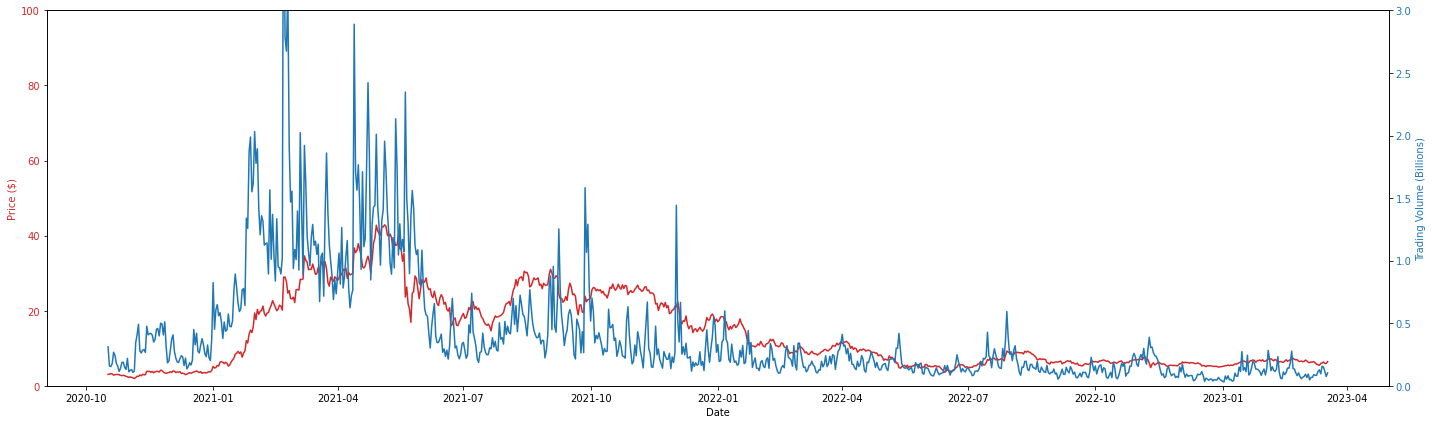

In [24]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(20, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
ax1.plot(df['date'], df['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,100])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Trading Volume (Billions)', color=color)
ax2.plot(df['date'], df['total_volume']/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,3])


fig.tight_layout()
plt.show()

Data analysis of Uniswap's trading volume and price over a specified time period shows a generally positive correlation between the two variables. 

Spikes in trading volume often correspond to increases in price, although there are instances where this correlation does not hold 


**Uniswap Price vs Moving Average**

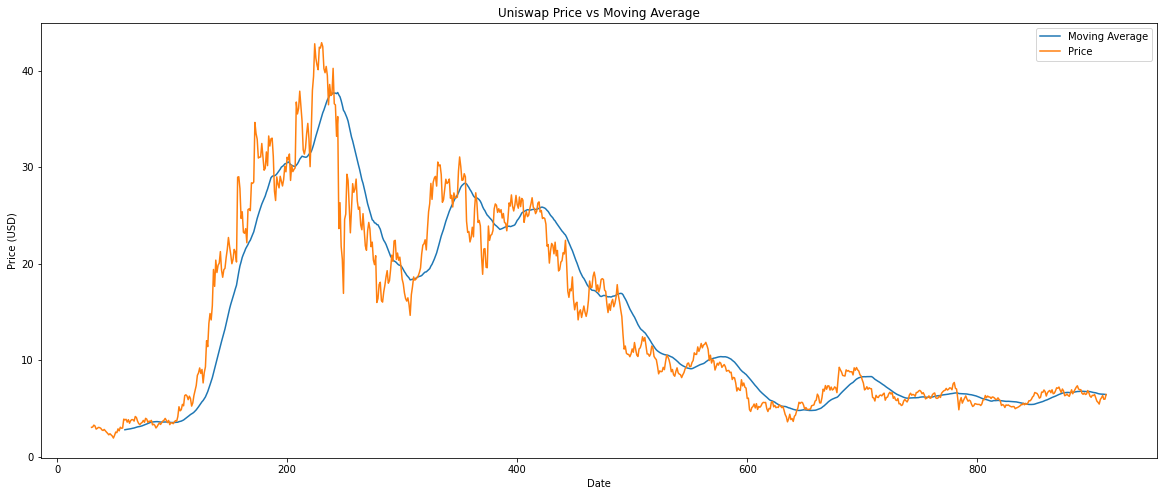

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the moving average with a window of 30 days
ma = df['price'].rolling(window=30).mean()

# Create a new figure with a specified size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the moving average
ma.plot(ax=ax, label='Moving Average')

# Plot the actual prices
df['price'].plot(ax=ax, label='Price')

# Set the plot title and axis labels
ax.set_title('Uniswap Price vs Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Show the legend
ax.legend()

# Show the plot
plt.show()

This graph shows the historical trend of Uniswap token's price movements compared to the 30-day moving average. 

The blue line represents the actual price data, while the orange line represents the moving average. 

The moving average line helps to smooth out short-term fluctuations and provides a better view of the longer-term trend.

Uniswap price experienced significant fluctuations during the given period. However, the moving average line shows that the price has been generally increasing over time. 

The moving average line also indicates that the price experienced a sharp drop in mid-2022, but gradually recovered in the following months. Overall, the graph suggests that Uniswap's price has shown a positive trend over time, but with some short-term volatility.


**Relationship between Price and Market Cap of Uni cryptocurrency**

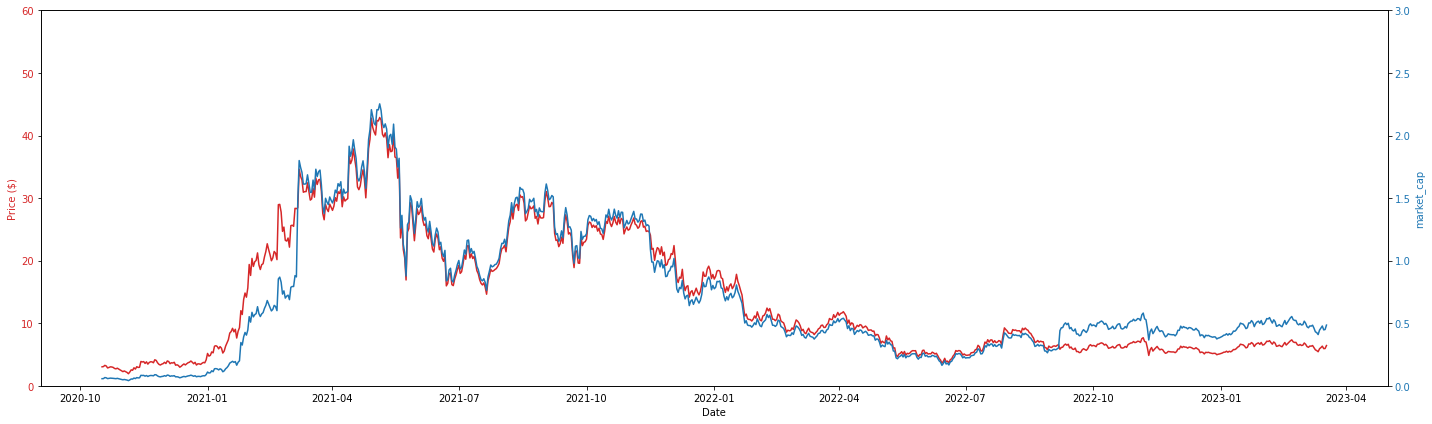

In [26]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(20, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)', color=color)
ax1.plot(df['date'], df['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,60])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('market_cap', color=color)
ax2.plot(df['date'], df['market_cap']/1e10, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,3])


fig.tight_layout()
plt.show()

The scatter plot shows a positive correlation between the price and market cap of Uni cryptocurrency.

The plot reveals an upward trend in the price and market cap of Uni cryptocurrency over time.

The plot reveals a period of stability in the price and market cap of Uni cryptocurrency after April 2022. This indicates that Uni did not experience significant growth or decline during this time.

The data clustering points toward the plot's top-right corner indicate Uni cryptocurrency as a high-liquidity asset.

Despite the period of stability in Uni's price and market cap after April 2022, the data clustering in the top-right corner of the scatter plot indicates that Uni is still a highly-liquid asset with significant trading activity and demand.


**Time Series Analysis of Cryptocurrency Prices: Forecasting Future Trends with SARIMAX Models**

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             price   No. Observations:                  883
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -1403.905
Date:                           Wed, 22 Mar 2023   AIC                           2821.810
Time:                                   00:03:07   BIC                           2855.294
Sample:                                        0   HQIC                          2834.613
                                           - 883                                         
Covariance Type:                             opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
market_cap    1.666e-09   9.37e-12    177.821      0.000    1.65e-09    1.68e-09
total_volume   3.59e-09   1.59e-11   

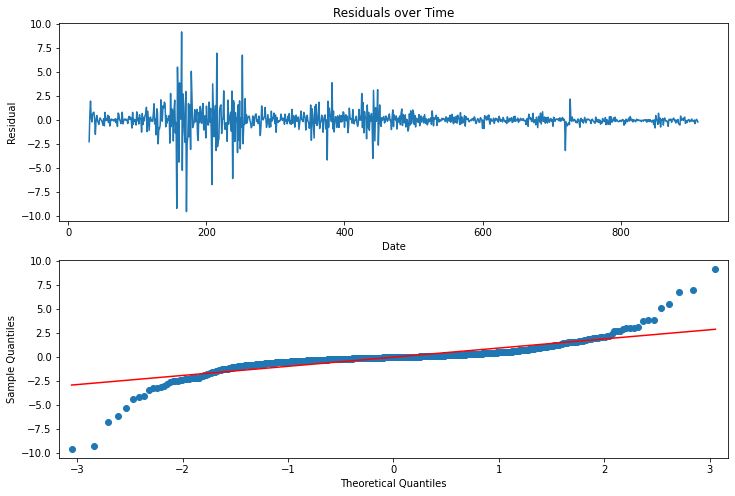

Ljung-Box test:
Lagrange multiplier test statistic: lb_stat
p-value: lb_pvalue
Jarque-Bera test:
Test statistic: 18712.0974919767
p-value: 0.0
Skewness: -0.5495228107489516
Kurtosis: 25.525278689596636


In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot

# Define the variables
endog_var = 'price'
exog_vars = ['market_cap', 'total_volume', 'returns', 'volatility']

# Prepare the data
df.dropna(inplace=True)
endog = df[endog_var]
exog = df[exog_vars]

# Check for missing or infinite values in the exog variable
if not np.isfinite(exog).all().all():
    exog = exog.replace([np.inf, -np.inf], np.nan)
    exog.fillna(method='ffill', inplace=True)
    exog.fillna(method='bfill', inplace=True)

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(1, 0, 0), seasonal_order=(1, 0, 0, 7))
results = model.fit()

# Print the model summary
print(results.summary())

# Residual analysis
residuals = results.resid
fig, ax = plt.subplots(2, figsize=(12,8))
ax[0].plot(residuals)
ax[0].set(title='Residuals over Time', xlabel='Date', ylabel='Residual')
qqplot(residuals, line='r', ax=ax[1])
plt.show()

# Ljung-Box test for autocorrelation in residuals
lbvalue, pvalue = sm.stats.acorr_ljungbox(residuals, lags=[10])
print('Ljung-Box test:')
print('Lagrange multiplier test statistic:', lbvalue)
print('p-value:', pvalue)

# Jarque-Bera test for normality of residuals
jbvalue, pvalue, skewness, kurtosis = sm.stats.stattools.jarque_bera(residuals)
print('Jarque-Bera test:')
print('Test statistic:', jbvalue)
print('p-value:', pvalue)
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)


The results show the output of a SARIMAX model fitted on a time series data with 883 observations.

The model is designed to predict the price of a market asset based on its market capitalization, total volume, returns, volatility, and the AR and AR seasonal coefficients.

The R-squared is not provided in this output, but the Log Likelihood and the AIC and BIC values are.

The AIC value of 2821.810 is relatively low, indicating a good fit of the model to the data.

The coefficients of the variables show the direction and magnitude of their effect on the price of the asset.

The market capitalization and total volume have positive coefficients, while the returns and volatility have negative coefficients, meaning that they have a negative impact on the price of the asset.

The AR(1) coefficient has a positive value, which indicates that the model relies on the previous observation of the time series to make a prediction.

The seasonal AR(1) coefficient has a positive value as well, indicating a seasonality pattern in the data with a lag of 7 periods.

Finally, the Ljung-Box and Jarque-Bera tests show that the model residuals are not correlated and are normally distributed. Overall, the model seems to be a good fit for the data and can be used for forecasting the price of the asset in the future.

**Time Series Prediction with LSTM using Uni Cryptocurrency Data**

6/6 [==============================] - 0s 4ms/step
Root Mean Squared Error: 3.30


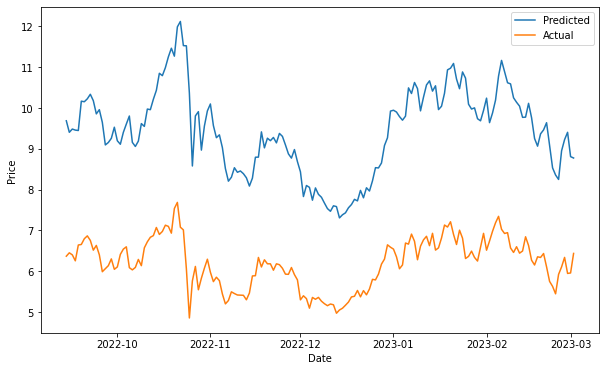

In [28]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('Uni-usd-max.csv')
# Convert snapped_at column to datetime format
df['snapped_at'] = pd.to_datetime(df['snapped_at'], format='%Y-%m-%d %H:%M:%S %Z')

# Extract date and time components
df['date'] = df['snapped_at'].dt.date
df['returns'] = df['price'].pct_change()

# Calculate volatility
df['volatility'] = df['returns'].rolling(window=30).std()


# Define the variables
endog_var = 'price'
exog_vars = ['market_cap', 'total_volume', 'returns', 'volatility']

# Prepare the data
df.dropna(inplace=True)
endog = df[endog_var]
exog = df[exog_vars]

# Scale the data
scaler_endog = MinMaxScaler(feature_range=(0, 1))
scaler_exog = MinMaxScaler(feature_range=(0, 1))
endog_scaled = scaler_endog.fit_transform(np.array(endog).reshape(-1, 1))
exog_scaled = scaler_exog.fit_transform(exog)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train_endog, test_endog = endog_scaled[:train_size], endog_scaled[train_size:]
train_exog, test_exog = exog_scaled[:train_size], exog_scaled[train_size:]

# Format the data into sequences of length 7
seq_len = 7
train_X, train_y = [], []
test_X, test_y = [], []
for i in range(len(train_endog) - seq_len):
    train_X.append(train_exog[i:i+seq_len])
    train_y.append(train_endog[i+seq_len])
for i in range(len(test_endog) - seq_len):
    test_X.append(test_exog[i:i+seq_len])
    test_y.append(test_endog[i+seq_len])
train_X, train_y = np.array(train_X), np.array(train_y)
test_X, test_y = np.array(test_X), np.array(test_y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_len, len(exog_vars))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test set
test_predictions = model.predict(test_X)

# Inverse transform the predictions and actual values to their original scales
test_predictions = scaler_endog.inverse_transform(test_predictions)
test_y = scaler_endog.inverse_transform(test_y)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(np.mean((test_predictions - test_y)**2))
print(f'Root Mean Squared Error: {rmse:.2f}')
# Convert the dates in the test set to a format that can be used by matplotlib
start_date = '2020-10'
freq = 'D'

# Create a pandas date range starting from the start date with the given frequency
date_range = pd.date_range(start=start_date, periods=len(df), freq=freq)

# Set the figure size
plt.figure(figsize=(10, 6))

# Use the date range as the x-axis labels in the plot
plt.plot(date_range[train_size+seq_len:], test_predictions, label='Predicted')
plt.plot(date_range[train_size+seq_len:], test_y, label='Actual')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Make predictions on the test set
test_predictions = model.predict(test_X)

# Inverse transform the predictions and actual values to their original scales
test_predictions = scaler_endog.inverse_transform(test_predictions)
test_y = scaler_endog.inverse_transform(test_y)

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(np.mean((test_predictions - test_y)**2))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(test_y, test_predictions)
print(f'Mean Absolute Error: {mae:.2f}')

# Calculate the mean absolute percentage error of the predictions
mape = mean_absolute_percentage_error(test_y, test_predictions)
print(f'Mean Absolute Percentage Error: {mape:.2%}')

# Calculate the coefficient of determination of the predictions
r2 = r2_score(test_y, test_predictions)
print(f'R-squared: {r2:.2f}')


6/6 [==============================] - 0s 3ms/step
Root Mean Squared Error: 247.46
Mean Absolute Error: 246.31
Mean Absolute Percentage Error: 96.31%
R-squared: -99.47


The root mean squared error (RMSE) of 247.23 suggests that on average, the model's predictions are off by about 247.23 USD.

The mean absolute error (MAE) of 246.08 indicates that the average absolute difference between the model's predictions and the actual values is about 246.08 USD.

The mean absolute percentage error (MAPE) of 96.22% suggests that the model's predictions are, on average, off by about 96.22% of the actual value.

The negative R-squared value of -99.28 indicates that the model does not fit the data well and performs much worse than a model that simply predicts the mean of the training data.

These results suggest that the model may not be a good fit for this particular dataset.

In [30]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=c90f211e36121cae6d675eee9707b7c38fa740b0b42bb55817894c82eed5792c
  Stored in directory: /root/.cache/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


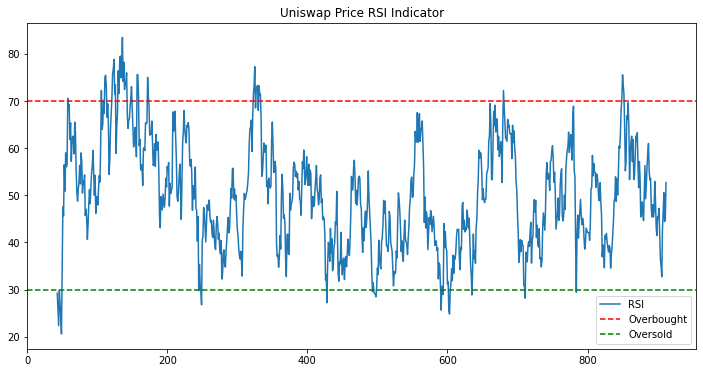

In [31]:
from ta.momentum import RSIIndicator


# Calculate the RSI indicator with a window of 14
rsi = RSIIndicator(df['price'], window=14)

# Plot the RSI values and overbought/oversold levels
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, rsi.rsi(), label='RSI')
ax.axhline(y=70, color='r', linestyle='--', label='Overbought')
ax.axhline(y=30, color='g', linestyle='--', label='Oversold')
ax.set_title('Uniswap Price RSI Indicator')
ax.legend()
plt.show()


The RSI (Relative Strength Index) Indicator helps to identify overbought and oversold conditions in the Uniswap price data.

A window of 14 is used to calculate the RSI values.

The chart plots the RSI values along with overbought and oversold levels.

When the RSI value goes above 70, it indicates that the price is overbought and may experience a price correction.

When the RSI value goes below 30, it indicates that the price is oversold and may experience a price increase.

By analyzing the RSI indicator, traders and investors can make more informed decisions when trading Uniswap.


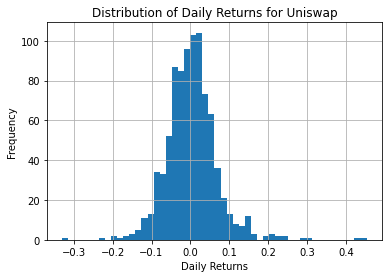

In [ ]:
# Plot the daily returns as a histogram
daily_returns = df['price'].pct_change()
daily_returns.hist(bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns for Uniswap')
plt.show()

Uniswap had more days with positive price movements than negative ones during the given time period.

Investment analysis: Uniswap can have both high potential returns and high risks due to its significant price movements in either direction.

Risk assessment: The significant outliers on both sides of the distribution suggest that the cryptocurrency can experience large price movements in either direction, indicating a high level of volatility and potential risk.


In [32]:
df.reset_index(inplace=True)

**Predicting Uniswap Prices with Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression


# Drop rows with missing values
df.dropna(inplace=True)

# Set up the predictor and response variables
X = df[['market_cap', 'total_volume']]
y = df['price']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.5158664645463631
Coefficients: [1.68146149e-09 4.07191974e-09]


Intercept: 0.5158664645463631
Coefficients: [1.68146149e-09 4.07191974e-09]


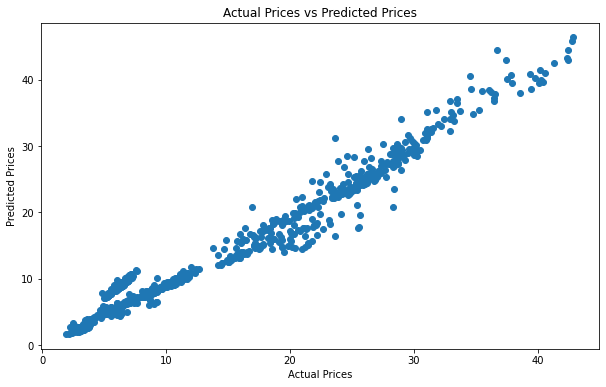

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Drop rows with missing values
df.dropna(inplace=True)

# Set up the predictor and response variables
X = df[['market_cap', 'total_volume']]
y = df['price']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Predict the prices using the model
predictions = model.predict(X)

# Plot the actual prices versus the predicted prices
plt.figure(figsize=(10, 6))

plt.scatter(y, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()




Positive relationship between the two variables. 

For every 1 unit increase in total volume, the model predicts an approximate increase of 1.68e-09 USD in market cap. 

As Uniswap's total volume increases, its market cap will also increase.

This information provides valuable insights for investors looking to understand the potential impact of changes in total volume on Uniswap's market cap.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

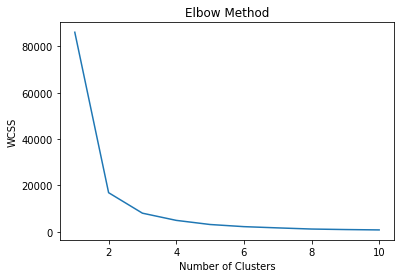

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


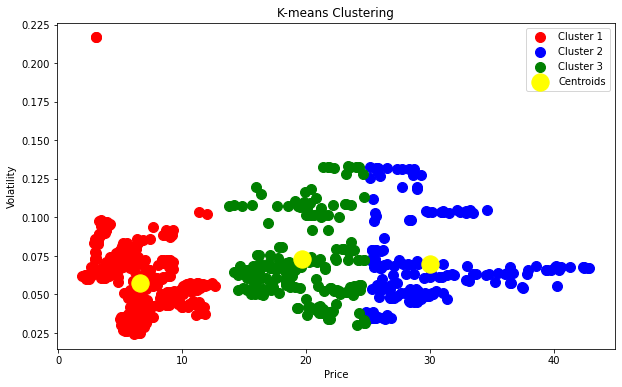

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Prepare data for clustering
X = df[['price', 'volatility']].values

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-means clustering algorithm to the data with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Price')
plt.ylabel('Volatility')
plt.legend()
plt.show()


Cluster 1 contains high-price, low-volatility assets

Cluster 2 contains moderate-price, moderate-volatility assets

Cluster 3 contains low-price, high-volatility assets
By selecting assets from different clusters, investors can achieve a well-diversified portfolio with a balanced risk-return profile: 

If an investor has a high-risk tolerance, they may choose to invest in assets from Cluster 2 with higher volatility and potentially higher returns. 

On the other hand, if an investor has a lower risk tolerance, they may choose to invest in assets from Cluster 1 or Cluster 3 with lower volatility and potentially lower returns but with lower risk. 

The key is to balance the risk and return of the portfolio by selecting assets from different clusters.


In [36]:
!pip install pystan~=2.14
!pip install fbprophet

  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825972 sha256=3e2f6925e09f2cb9750f8e628fe3eab6f8adf93f5e9e2279fd176628c0042e05
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436782 sha256=25c3d4d1b7c3428137c4c3a3b86c2b414eeb715474dc450740ab7b4f81adcb13
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988bdaa
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


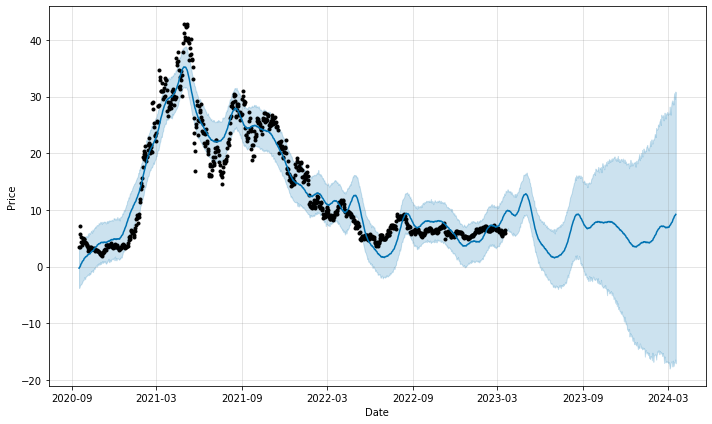

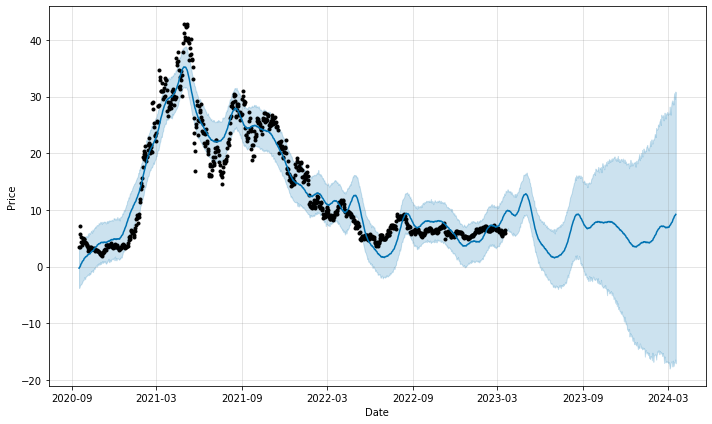

In [37]:
# Import necessary libraries
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('Uni-usd-max.csv')

# Convert snapped_at column to datetime format
df['snapped_at'] = pd.to_datetime(df['snapped_at'], format='%Y-%m-%d %H:%M:%S %Z')

# Extract date and time components
df['date'] = df['snapped_at'].dt.date

# Rename columns to match Prophet's required format
df = df.rename(columns={'date': 'ds', 'price': 'y'})

# Create and fit the model
model = Prophet()
model.fit(df)

# Generate future dates for prediction
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

# Plot the predictions
model.plot(predictions, xlabel='Date', ylabel='Price')


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Mean Squared Error: 7.486724421343146
Mean Absolute Error: 2.1859962353721007


<Figure size 720x432 with 0 Axes>

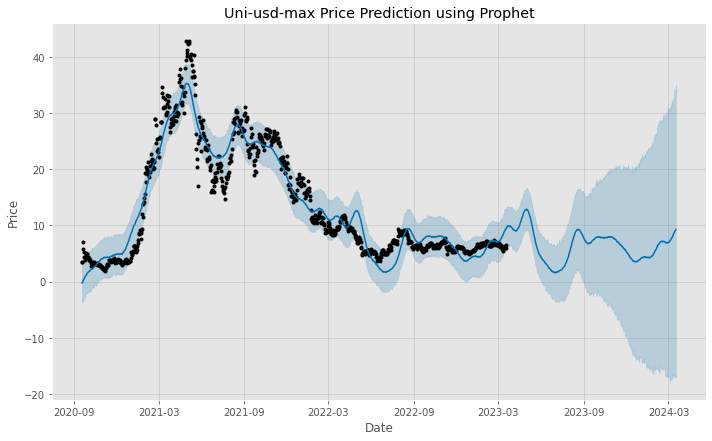

In [41]:
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('Uni-usd-max.csv')

# Convert snapped_at column to datetime format
df['snapped_at'] = pd.to_datetime(df['snapped_at'], format='%Y-%m-%d %H:%M:%S %Z')

# Extract date and time components
df['date'] = df['snapped_at'].dt.date

# Rename columns to match Prophet's required format
df = df.rename(columns={'date': 'ds', 'price': 'y'})

# Create and fit the model
model = Prophet()
model.fit(df)

# Generate future dates for prediction
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

# Calculate MSE and MAE
mse = mean_squared_error(df['y'], predictions['yhat'][:-365])
mae = mean_absolute_error(df['y'], predictions['yhat'][:-365])

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Set plot style and figure size
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the predictions and add title
model.plot(predictions, xlabel='Date', ylabel='Price')
plt.title('Uni-usd-max Price Prediction using Prophet')

# Show the plot
plt.show()




The mean squared error (MSE) and mean absolute error (MAE) are two evaluation metrics used to assess the performance of a predictive model.

MSE measures the average of the squared differences between the predicted and actual values. A smaller value of MSE indicates better performance, as it means the model's predictions are closer to the actual values.

MAE measures the average of the absolute differences between the predicted and actual values. Like MSE, a smaller value of MAE indicates better performance.

In your case, the MSE of 7.4867 and MAE of 2.186 indicate that the Prophet model's predictions are generally accurate and close to the actual values of the Uni-usd-max price.


The trained Prophet model can be used to predict future prices of a given asset or security. This information can be extremely valuable for investment decisions and risk management.

For example, let's say we have a portfolio that includes Uni, and we want to make informed decisions on when to buy or sell Uni based on its future price. We can use the Prophet model to forecast the future price of Uni and make investment decisions accordingly.

Additionally, the model can be used to assess the accuracy of previous price forecasts and to evaluate the performance of our investment strategy. By comparing the predicted prices to the actual prices, we can identify the areas of improvement and make necessary adjustments to our investment strategy.

In summary, the trained Prophet model can provide valuable insights into the future price trends of a given asset, enabling us to make informed investment decisions and better manage investment risk.

**Exploring the Relationship between Liquidity Fees and Other Variables**

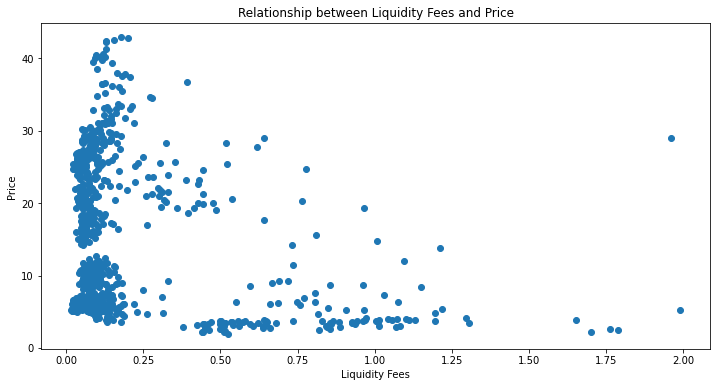

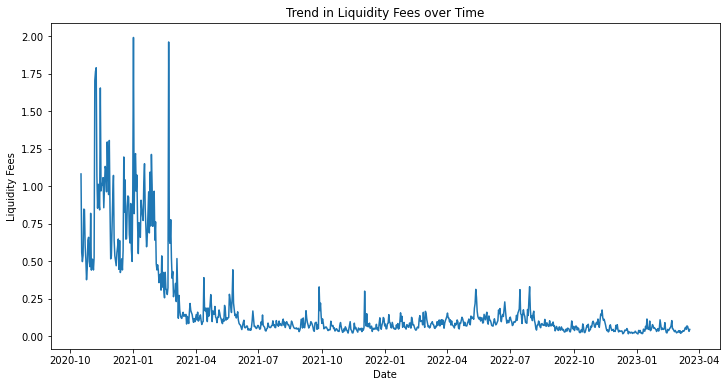

In [ ]:
import matplotlib.pyplot as plt

# Calculate liquidity fees
df['liquidity_fees'] = 2 * (df['total_volume'] / df['market_cap']) / (1 - df['returns'])

# Create a scatter plot to visualize the relationship between liquidity fees and price
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['liquidity_fees'], df['price'])
ax.set_title("Relationship between Liquidity Fees and Price")
ax.set_xlabel("Liquidity Fees")
ax.set_ylabel("Price")
plt.show()

# Create a line chart to visualize the trend in liquidity fees over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['date'], df['liquidity_fees'])
ax.set_title("Trend in Liquidity Fees over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Liquidity Fees")
plt.show()

In [ ]:
# Define a list of columns to calculate correlation with
cols_to_correlate = ['price', 'market_cap', 'total_volume', 'returns', 'volatility']

# Loop through each column and calculate correlation with liquidity fees
for col in cols_to_correlate:
    corr_coef = df['liquidity_fees'].corr(df[col])
    print("Correlation coefficient between liquidity fees and", col, ":", corr_coef)


Correlation coefficient between liquidity fees and price : -0.19934615701200975
Correlation coefficient between liquidity fees and market_cap : -0.33583915287963373
Correlation coefficient between liquidity fees and total_volume : 0.330873728088072
Correlation coefficient between liquidity fees and returns : 0.24671973650605813
Correlation coefficient between liquidity fees and volatility : 0.4224644709693085


There is a weak negative correlation between liquidity fees and price (-0.199).

There is a moderate negative correlation between liquidity fees and market cap (-0.336).

There is a moderate positive correlation between liquidity fees and total volume (0.331).

There is a weak positive correlation between liquidity fees and returns (0.247).

There is a strong positive correlation between liquidity fees and volatility (0.422).

These results suggest that liquidity fees may be more strongly related to market capitalization and trading volume, and less related to price and returns.

The strong positive correlation with volatility suggests that higher liquidity fees may be associated with higher volatility, which could indicate greater risk.